#### KNN K-nearest Iris flower 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [2]:
iris = pd.read_csv('/Users/gracechongzuting/Downloads/IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


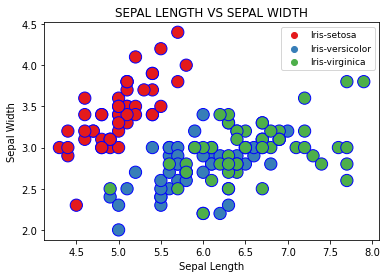

In [28]:

sns.scatterplot('sepal_length', 'sepal_width', data = iris, hue = 'species', palette = 'Set1', edgecolor = 'b', s = 150, 
               alpha = 1)
plt.title('SEPAL LENGTH VS SEPAL WIDTH')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc = 'upper right', fontsize = 9)


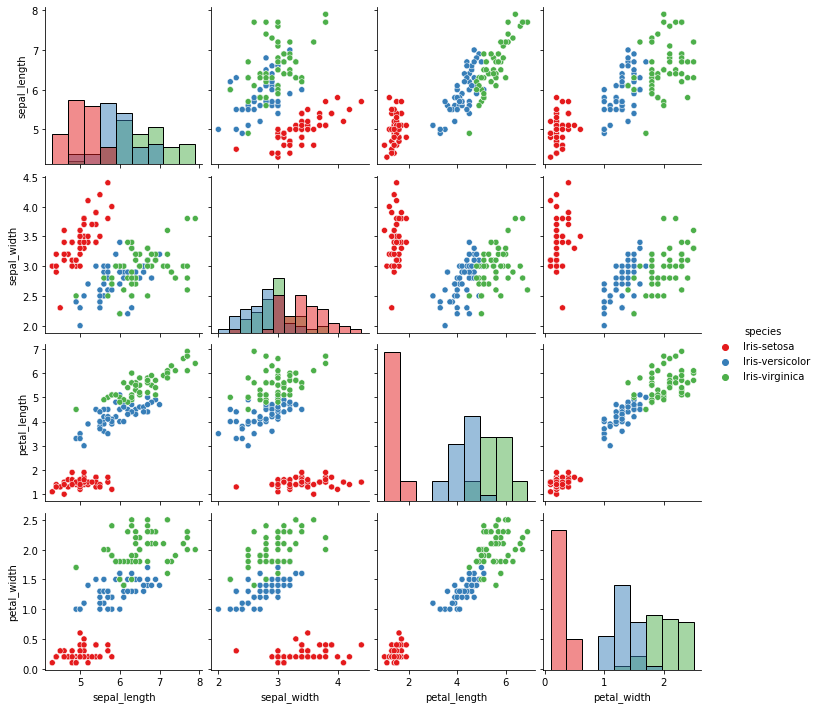

In [33]:
#colors = ['red','blue','green']
#colors_species = iris['species'].map(lambda s:colors[s])
sns.pairplot(iris, hue = 'species', palette = 'Set1',diag_kind="hist")

#### Train Test Split

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
X = iris[['sepal_length', 'sepal_width','petal_length','petal_width']]
y = iris['species']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [47]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

##### Instantiate KNN Kneighbours classifier
- value of default K=5
- Closer points can have a higher weighted vote (distance)
- Default Euclidean distance is p=2. Manhattan is p=1

In [48]:
knn = KNeighborsClassifier()

#### lets check accuracy using cross_val_score ,that is to be expected in our KNN model.

In [57]:
iris_cvs = cross_val_score(knn,X_train_sc, y_train, cv =7)
print(f'the cross_val_score is {iris_cvs.mean()}')

the cross_val_score is 0.9285714285714286


In [53]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [54]:
print(f'the trained Knearest score is {knn.score(X_train_sc,y_train)}')
print(f'the tested Knearest score is {knn.score(X_test_sc,y_test)}')

the trained Knearest score is 0.9821428571428571
the tested Knearest score is 0.9210526315789473


#### let's determine best K neighbour value 

In [71]:
train_score = []
test_score = []


for k in range(1,20):
    knn_determine = KNeighborsClassifier(n_neighbors=k)
    #X axis
    train_cvs = cross_val_score(knn_determine, X_train_sc,y_train, cv=7).mean()
    train_score.append(train_cvs)
    # y axis
    train_scoring = knn_determine.fit(X_train_sc,y_train)
    test_scoring = knn_determine.score(X_test_sc,y_test)
    test_score.append(test_scoring)


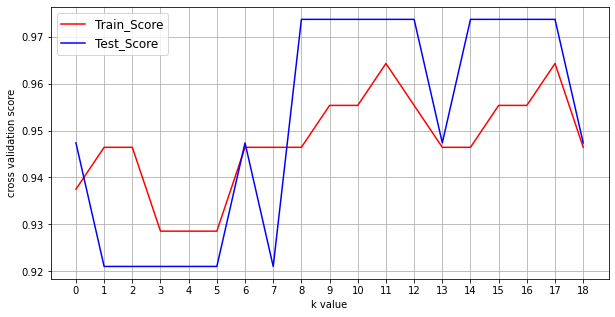

In [82]:



plt.figure(figsize=(10,5))
plt.xlabel('k value')
plt.ylabel('cross validation score')
plt.plot(train_score, color = 'red', label = 'Train_Score')
plt.plot(test_score, color = 'blue', label = 'Test_Score')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(range(k))
plt.grid()





### Hence, we can conclude that the best K-value are 6,13,18